<a href="https://colab.research.google.com/github/mariahmota/FCE_aula/blob/main/P2_FCE_Mariah_Mota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segunda Avaliação - Fundamentos Computacionais para Engenharia**


---


### Mariah Gonçalves Mota - 2021102002

## **PARTE 1 - Conceitos Fundamentais (teoria e compreensão)**

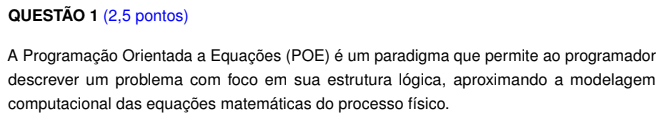

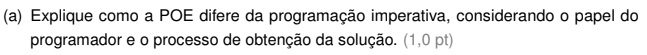

(a) Na Programação Orientada a Equações (POE), uma vez que o programador concentra-se na definição de relações matemáticas entre variáveis, sejam equações algébricas ou derivadas, não assume o papel de controle do fluxo de execução como na programação imperativa, em função de não focar na implementação de uma sequência de comandos. Neste sentido, enquanto no paradigma imperativo há uma estrutura composta por um passo a passo que deve ser executado para resolver o problema, na POE a obtenção da solução que satifaz as equações é encontrada por um resolvedor, o qual é denominado solver.

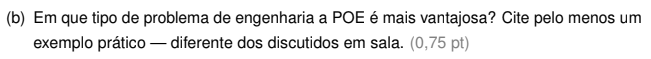

(b) A POE é mais vantajosa para resolver problemas de engenharia que envolvem sistema de equações algébricas e diferenciais complexas, para fins de modelagem, simulação ou otimização. Por exemplo, pode-se modelar simultaneamente o perfil de temperatura ao longo do comprimento de um trocador de calor e o perfil de temperatura em função do tempo ou, em uma série de trocadores de calor, simular o coeficiente global de transferência de calor ao longo do tempo devido ao aparecimento de incrustações.

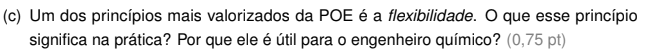

(c) O princípio flexibilidade da POE permite que o mesmo conjunto de equações pode ser resolvido para diferentes variáveis, em outras palavras, é possível determinar qual variável de saída é desejada a depender das variáveis de entrada inseridas, sem alterar as equações. Desta forma, permite a reutilização de sistemas de equações bem como do código, conferindo maior agilidade para os engenheiros químicos na modelagem, simulação e otimização de processos.

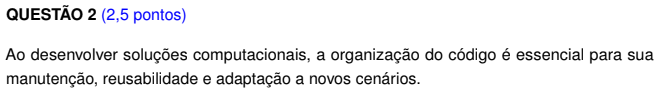

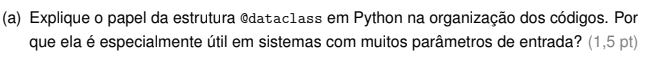

(a) A estrutura @dataclass em Python permite agrupar variáveis relacionadas, armazenando somente dados, que podem ser utilizados por diferentes partes do código. Desta forma, confere maior legibilidade, favorece a reutilização e torna o código mais consiso e modular, contribuindo para organização do mesmo. Tal solução é útil principalmente em sistemas com muitos parâmetros de entrada, visto que podem ser agrupados por meio da estrutura em questão, evitando erros com a ordem dos argumentos quando utilizados em funções. Além do código mais claro, facilita na manipulação dos parâmetros, os quais podem ser alterados, removidos ou adicionados.

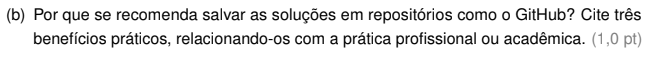

(b) Recomenda-se salvar as soluções em repositórios como o GitHub por facilitar a organização dos códigos e haver a integração com notebook de simulações. Dentre os benefícios práticos, pode-se citar o compartilhamento com colegas e professores, facilitando o acesso para avaliação de atividades, consulta dos materiais ou colaboração em projetos. Além disso, pode representar um portfólio profissional, auxiliando na demonstração das habilidades em processos seletivos. Por fim, há controle de versões, em que pode registrar alterações realizadas e é possível retornar versões anteriores.



## **PARTE 2 - Aplicações e Lógica Computacional (modelagem e simulação)**

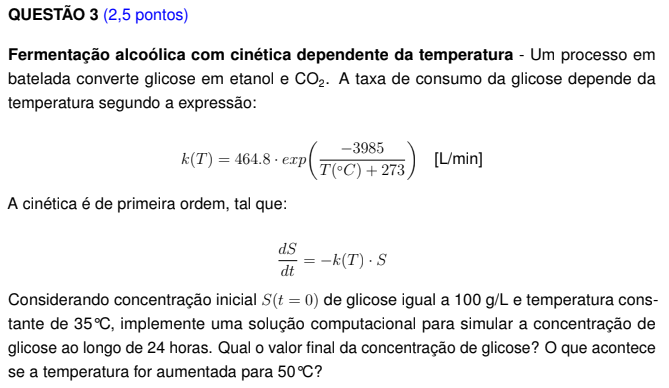

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt


In [36]:
@dataclass
class ParametrosFermentacao:
  """
  Representa os parâmetros do modelo de fermentação de glicose

  Atributos:
    S0 (float): Concentração inicial de glicose (g/L).
    T (float): Temperatura (°C).
  """
  S0: float = 100.0
  T: float = 35.0

In [37]:
def modelo_fermentacao(t, S, params):
  """
  Modelo matemático para a fermentação de glicose.
  Calcula a taxa de variação da concentração de glicose com o tempo.
  Args:
    t (float): Tempo (min).
    S (float): Concentração de glicose (g/L).
  """

  T = params.T
  k = 464.8*np.exp(-3985/(T+273)) # L/min
  dSdt = -k*S

  return dSdt

In [56]:
def simulacao_fermentacao(tempo, params):
  """
  Resolve o modelo, calcula a concentração final de glicose.
  Também retorna os valores de tempo e a concentração ao longo do tempo
  Args:
    tempo (list): Lista de tempos (min).
    params (ParametrosFermentacao): Parâmetros do modelo.
  """

  S0 = params.S0
  t_eval = np.linspace(tempo[0], tempo[-1], 100)
  sol = solve_ivp(modelo_fermentacao, tempo, [S0], t_eval = t_eval, args=(params,), method = 'BDF')
  conc_final = sol.y[0, -1]

  return conc_final, sol.t, sol.y[0]


Concentração final de glicose (T = 35°C): 20.01 g/L
Concentração final de glicose (T = 50°C): 5.31 g/L



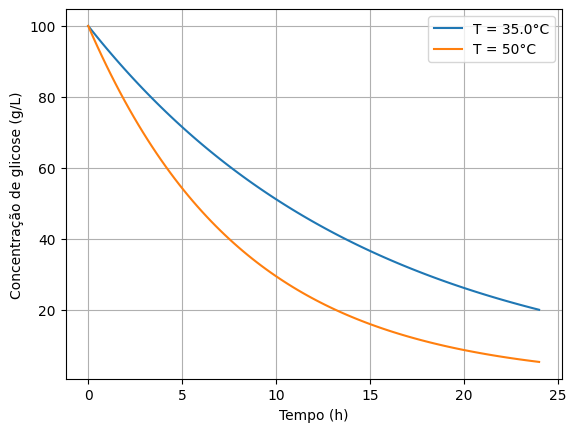

In [62]:
# Simulação
tempo = [0, 24*60] # tempo em minutos, análise da concentração ao longo de 24 horas
lista_params = [ParametrosFermentacao(),
                ParametrosFermentacao(T=50)]
conc = []
for params in lista_params:
  conc_final, t, S = simulacao_fermentacao(tempo, params)
  conc.append(conc_final)
  plt.plot(t/60, S, label=f"T = {params.T}°C")

plt.xlabel('Tempo (h)')
plt.ylabel('Concentração de glicose (g/L)')
plt.legend()
plt.grid()

print(f"Concentração final de glicose (T = 35°C): {conc[0]:.2f} g/L")
print(f"Concentração final de glicose (T = 50°C): {conc[1]:.2f} g/L")
print()

Para uma temperatura constante de 35°C, a concentração final de glicose será 20.01 g/L. Ao aumentar a temperatura para 50°C, há uma redução da concentração para 5.31 g/L, resultado esperado, uma vez que acelera a cinética (maior k), havendo um decaimento mais rápido da concentração. Isto pode ser observado pelos gráficos.

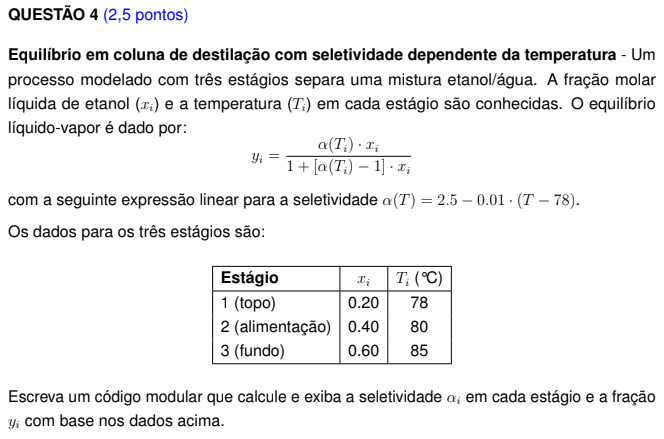

In [7]:
import numpy as np
from dataclasses import dataclass

In [40]:
@dataclass
class ParametrosEstagios:
  """
  Representa os dados dos estágios de uma coluna de destilação
  Atributos:
  x  (float): Fração molar líquida de etanol
  T  (float): Temperatura (°C)
  """
  x: float # Fração molar líquida de etanol
  T: float # Temperatura (°C)

In [64]:
def coluna_destilacao(param):
  """
  Calcula a seletividade (alpha) e a fração molar de vapor de etanol (y)

  """
  T, x = param.T, param.x
  alpha = 2.5 - 0.01*(T-78)
  y = (alpha*x)/(1+(alpha-1)*x)

  return alpha, y

In [65]:
lista_estagios = [ParametrosEstagios(x=0.20, T=78.0),
                  ParametrosEstagios(x=0.40, T=80.0),
                  ParametrosEstagios(x=0.60, T=85.0)]

cont = 1
for estagio in lista_estagios:
  alpha, y = coluna_destilacao(estagio)
  print(f'Estágio {cont}:', f'alpha = {alpha:.2f}', f'y = {y:.2f}')
  cont = cont + 1



Estágio 1: alpha = 2.50 y = 0.38
Estágio 2: alpha = 2.48 y = 0.62
Estágio 3: alpha = 2.43 y = 0.78
